In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [3]:
store = pd.read_csv('store.csv')   
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')  

C:\Users\Admin\AppData\Local\Temp\ipykernel_3328\4083153265.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


In [4]:
df_merge = pd.merge(train, store, on='Store', how='left')
print(df_merge.shape)


(1017209, 18)


In [5]:
# Check for missing values
df_merge.isnull().sum().sort_values(ascending=False)

Promo2SinceWeek              508031
PromoInterval                508031
Promo2SinceYear              508031
CompetitionOpenSinceYear     323348
CompetitionOpenSinceMonth    323348
CompetitionDistance            2642
DayOfWeek                         0
Store                             0
Date                              0
Sales                             0
StoreType                         0
SchoolHoliday                     0
StateHoliday                      0
Promo                             0
Open                              0
Customers                         0
Assortment                        0
Promo2                            0
dtype: int64

In [6]:
# fill na values = 0
df_merge[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']] = df_merge[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].fillna(0)
df_merge[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']] = df_merge[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].fillna(0)

# fill 'CompetitionDistance' na values with median
median_competition_distance = df_merge['CompetitionDistance'].median()
df_merge['CompetitionDistance'] = df_merge['CompetitionDistance'].fillna(median_competition_distance)

In [7]:
# Extract time features
df_merge['Date'] = pd.to_datetime(df_merge['Date'], format='%Y-%m-%d')
df_merge['Year'] = df_merge['Date'].dt.year   
df_merge['Month'] = df_merge['Date'].dt.month
df_merge['Day'] = df_merge['Date'].dt.day
df_merge['WeekOfYear'] = df_merge['Date'].dt.isocalendar().week

print(f"Dữ liệu từ ngày: {df_merge['Date'].min()} đến ngày: {df_merge['Date'].max()}")
print(f"Tổng số ngày: {(df_merge['Date'].max() - df_merge['Date'].min()).days}")

Dữ liệu từ ngày: 2013-01-01 00:00:00 đến ngày: 2015-07-31 00:00:00
Tổng số ngày: 941


In [8]:
print("Số lượng giá trị duy nhất của các cột phân loại:")
cols_to_check = ['StoreType', 'Assortment', 'StateHoliday', 'SchoolHoliday']
for col in cols_to_check:
    print(f"{col}: {df_merge[col].unique()}")

Số lượng giá trị duy nhất của các cột phân loại:
StoreType: ['c' 'a' 'd' 'b']
Assortment: ['a' 'c' 'b']
StateHoliday: ['0' 'a' 'b' 'c' 0]
SchoolHoliday: [1 0]


In [9]:
# Xử lý biến 'StateHoliday'
df_merge['StateHoliday'] = df_merge['StateHoliday'].astype(str)
# Map các giá trị '0' và 0 thành chuỗi '0'
df_merge['StateHoliday'] = df_merge['StateHoliday'].replace({'0': '0', 0: '0'})

In [10]:
# Lọc dữ liệu: Chỉ lấy những ngày cửa hàng MỞ CỬA (Open == 1) và có Doanh thu > 0
# Lý do: Nếu tính cả ngày đóng cửa (Sales=0), trung bình của "Không Promo" sẽ bị kéo xuống thấp sai lệch.
#df_open = df_merge[(df_merge['Open'] == 1) & (df_merge['Sales'] > 0)].copy()
df_open = df_merge.copy()
#print("\n--- CHỈ LẤY NHỮNG NGÀY MỞ CỬA VÀ CÓ DOANH THU > O ---")
print("\n LẤY HẾT CẢ NHỮNG NGÀY ĐÓNG CỬA ĐỂ XEM TÁC ĐỘNG ĐỐI VỚI SALES")
print(f"Tổng số dòng: {df_open.shape[0]}")
print(f"Tổng số cột: {df_open.shape[1]}")
display(df_open.head())


 LẤY HẾT CẢ NHỮNG NGÀY ĐÓNG CỬA ĐỂ XEM TÁC ĐỘNG ĐỐI VỚI SALES
Tổng số dòng: 1017209
Tổng số cột: 22


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31,31


In [11]:
# Feature engineering các biến Competition và Promo thành biến có ý nghĩa hơn
# Tính thời gian đối thủ mở cửa hàng (tính theo tháng)
df_open['CompetitonOpen'] = 12 * (df_open['Year'] - df_open['CompetitionOpenSinceYear']) + (df_open['Month'] - df_open['CompetitionOpenSinceMonth'])
# Nếu CompetitonOpen < 0 thì gán = 0 (đối thủ chưa mở cửa)
df_open['CompetitionOpen'] = df_open['CompetitonOpen'].apply(lambda x: x if x > 0 else 0)
# Tính thời gian tham gia promo2 (tính theo tháng) và gán giá trị âm bằng 0 (Không tham gia promo2)
df_open['Promo2Open'] = 12 * (df_open['Year'] - df_open['Promo2SinceYear']) + ((df_open['WeekOfYear'] - df_open['Promo2SinceWeek']) // 4)
df_open['Promo2Open'] = df_open['Promo2Open'].apply(lambda x: x if x > 0 else 0)
# Bỏ các cột gốc đi để tránh nhiễu
cols_to_drop = ['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'Promo2SinceYear', 'Promo2SinceWeek']
df_open = df_open.drop(columns=cols_to_drop)

In [12]:
# Gợi ý thêm Feature Engineering nâng cao hơn:
# 1. Thêm các cột đánh dấu thời gian đặc biệt
df_open['IsWeekend'] = df_open['DayOfWeek'].apply(lambda x: 1 if x >= 6 else 0)
df_open['IsMonthStart'] = df_open['Day'].apply(lambda x: 1 if x == 1 else 0)
df_open['IsMonthEnd'] = df_open['Day'].apply(lambda x: 1 if x >= 30 else 0) 

# 2. Cyclical Encoding cho DayOfWeek và Month
# Giúp model hiểu tính chu kỳ (Thứ 7 gần Chủ Nhật, Tháng 12 gần Tháng 1)
df_open['DayOfWeek_Sin'] = np.sin(2 * np.pi * df_open['DayOfWeek'] / 7)
df_open['DayOfWeek_Cos'] = np.cos(2 * np.pi * df_open['DayOfWeek'] / 7)
df_open['Month_Sin'] = np.sin(2 * np.pi * df_open['Month'] / 12)
df_open['Month_Cos'] = np.cos(2 * np.pi * df_open['Month'] / 12)

# 3. Tính toán các biến tương tác
df_open['SalesPerCustomer'] = df_open['Sales'] / df_open['Customers'].replace(0, np.nan)  # Tránh chia cho 0

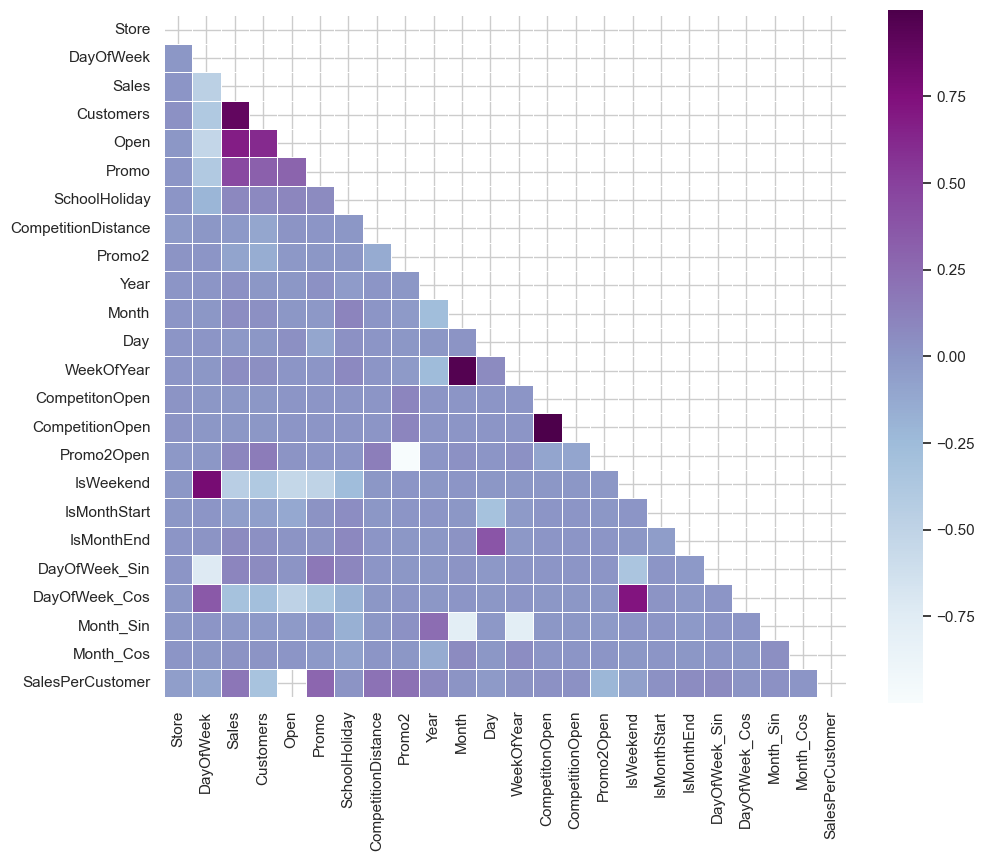

In [13]:
# Heatmap
# Lấy numerical columns rồi loại 'Open'
df_num = df_open.select_dtypes(include=[np.number])

# Compute correlation
corr_all = df_num.corr()

# Mask upper triangle
mask = np.zeros_like(corr_all, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot
plt.figure(figsize=(11, 9))
sns.heatmap(corr_all, mask=mask, cmap="BuPu", square=True, linewidths=0.5)
plt.show()


# ẢNH HƯỞNG CỦA THỜI GIAN ĐỐI VỚI DOANH THU 

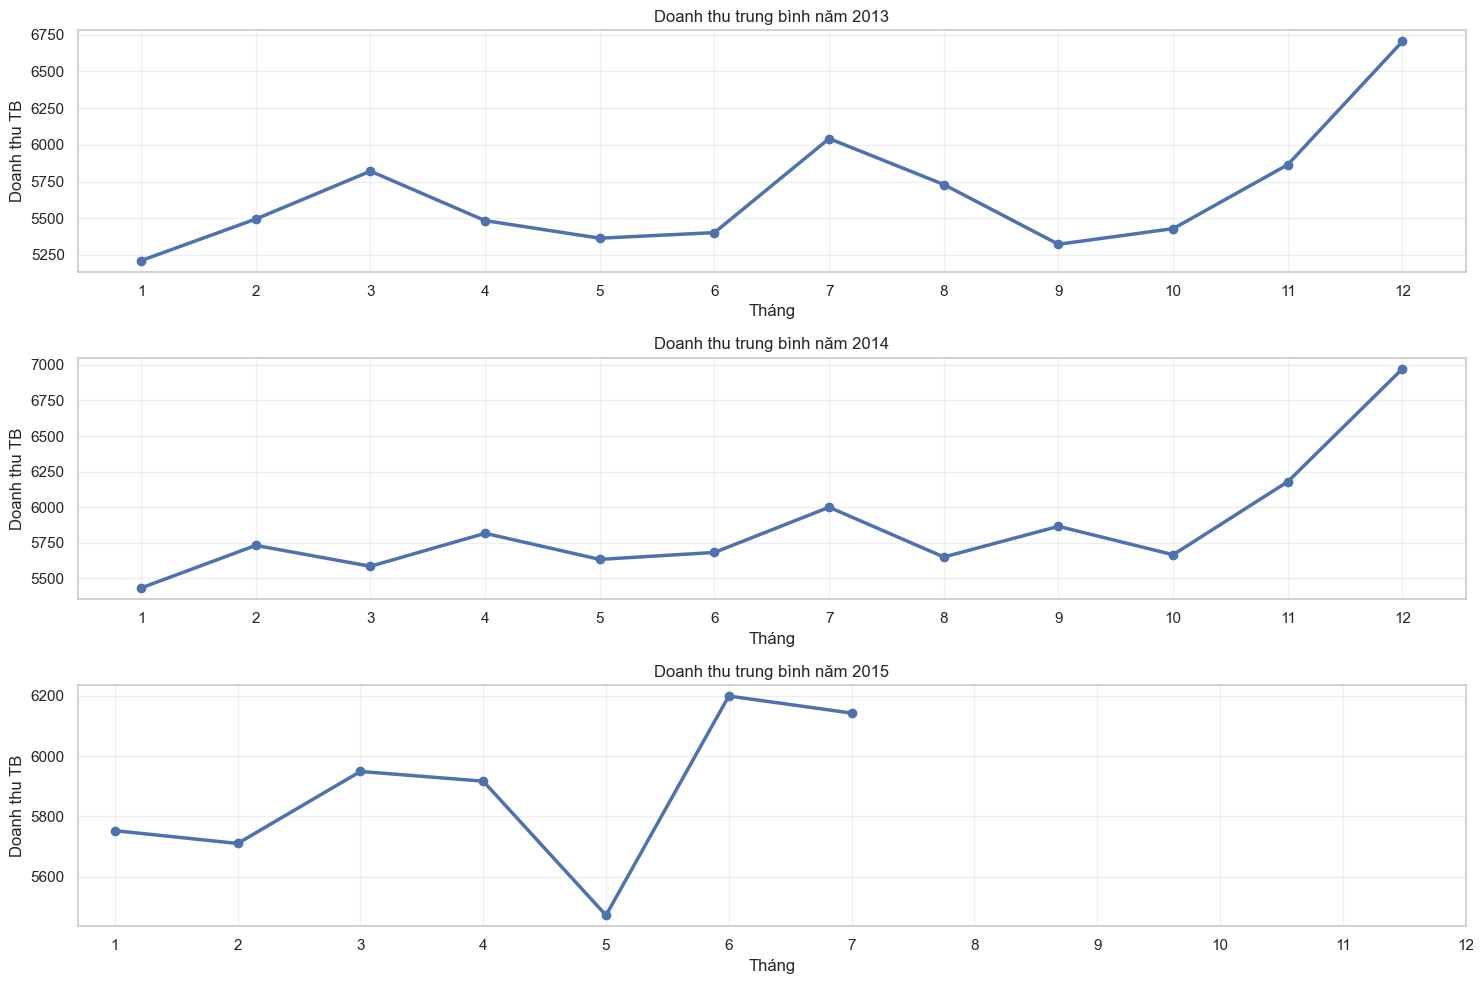

In [14]:
# monthly_sales: index = Month, columns = 2013, 2014, 2015

monthly_sales = df_open.groupby(['Year', 'Month'])['Sales'].mean().unstack(level=0)

years = monthly_sales.columns.tolist()

plt.figure(figsize=(15, 10))

for i, year in enumerate(years, 1):
    plt.subplot(3, 1, i)
    plt.plot(monthly_sales.index, monthly_sales[year], marker='o', linewidth=2.5)
    plt.title(f'Doanh thu trung bình năm {year}')
    plt.xlabel('Tháng')
    plt.ylabel('Doanh thu TB')
    plt.grid(True, alpha=0.3)
    plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()


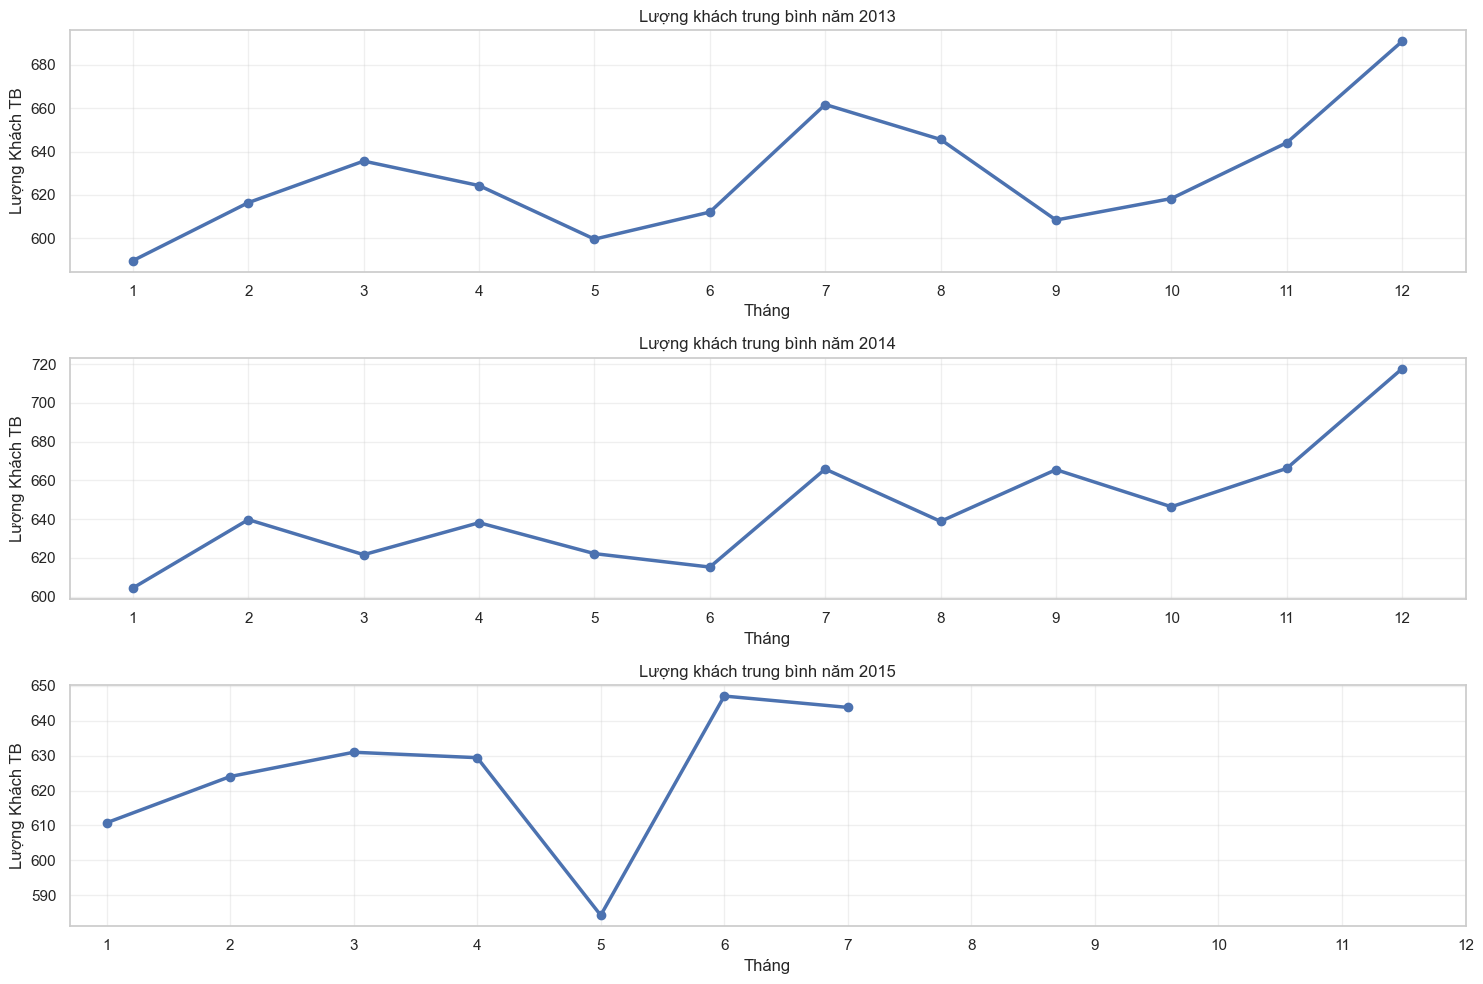

In [15]:
monthly_customers = df_open.groupby(['Year', 'Month'])['Customers'].mean().unstack(level=0)

years = monthly_customers.columns.tolist()

plt.figure(figsize=(15, 10))

for i, year in enumerate(years, 1):
    plt.subplot(3, 1, i)
    plt.plot(monthly_customers.index, monthly_customers[year], marker='o', linewidth=2.5)
    plt.title(f'Lượng khách trung bình năm {year}')
    plt.xlabel('Tháng')
    plt.ylabel('Lượng Khách TB')
    plt.grid(True, alpha=0.3)
    plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()


# Thời gian nào trong năm là mỏ vàng doanh thu?
    + Tháng 11: Doanh thu trung bình tăng mạnh
    + Tháng 12: Doanh thu trung bình đạt đỉnh cao nhất năm

    => Insight: 

        + Đây là mùa cao điểm bán hàng bởi có ngày lễ Giáng Sinh khiến nhu cầu mua sắm tăng mạnh được thể hiện qua lượng khách tăng cao vào dịp này 

        + Chuỗi nên: 
            + Đẩy mạnh promo vào quý cuối năm
            + Tăng hàng tồn kho
            + Tăng nhân sự

In [ ]:
# 1. Tính trung bình Sales và Customers theo Tháng
monthly_stats = df_open.groupby('Month')[['Sales', 'Customers']].mean()

# 2. Tính % tăng trưởng so với tháng trước đó để thấy rõ "tăng mạnh" hay không
monthly_stats['Sales_Growth_Pct'] = monthly_stats['Sales'].pct_change() * 100
monthly_stats['Customers_Growth_Pct'] = monthly_stats['Customers'].pct_change() * 100

# 3. Hiển thị bảng số liệu của Quý 4 (Tháng 10, 11, 12) để so sánh
print("Số liệu trung bình Quý 4")
display(monthly_stats.loc[[10, 11, 12]])

# 4. Xác nhận tháng có doanh thu cao nhất
max_sales_month = monthly_stats['Sales'].idxmax()
print(f"\nTháng có doanh thu trung bình cao nhất năm là: Tháng {max_sales_month}")

--- Số liệu trung bình Quý 4 ---


,Sales,Customers,Sales_Growth_Pct,Customers_Growth_Pct
Month,,,,
10,5537.037419,631.095987,-0.596179,-0.526877
11,6008.111821,654.147967,8.507698,3.652690
12,6826.611377,703.067899,13.623241,7.478420



Tháng có doanh thu trung bình cao nhất năm là: Tháng 12


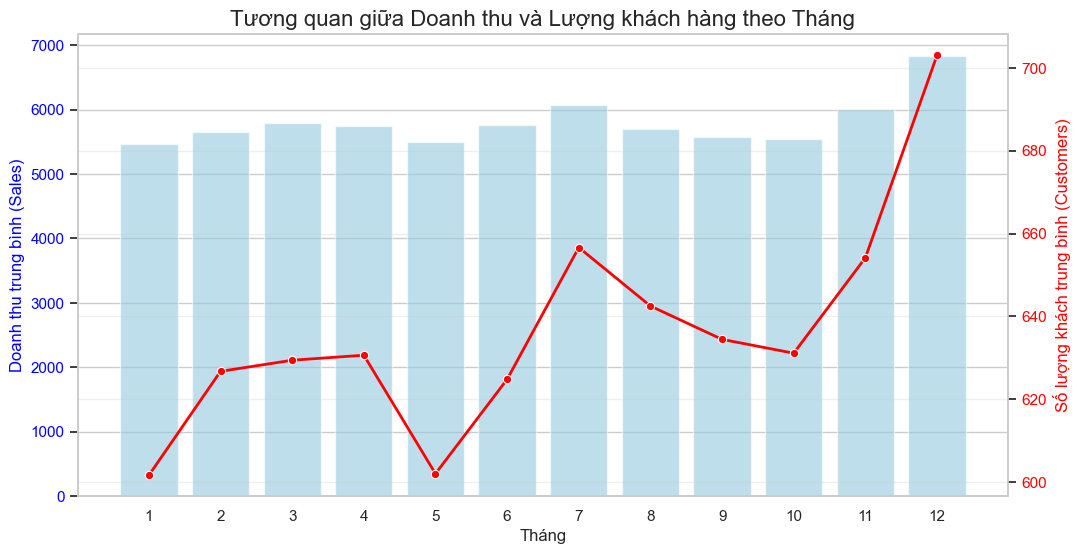

In [17]:
# Thiết lập biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))

# Trục 1: Vẽ biểu đồ cột cho Doanh thu (Sales)
sns.barplot(x=monthly_stats.index, y=monthly_stats['Sales'], color='skyblue', alpha=0.6, ax=ax1)
ax1.set_ylabel('Doanh thu trung bình (Sales)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Tháng', fontsize=12)

# Trục 2: Vẽ biểu đồ đường cho Lượng khách (Customers)
ax2 = ax1.twinx()
sns.lineplot(x=monthly_stats.index - 1, y=monthly_stats['Customers'], color='red', marker='o', linewidth=2, ax=ax2)
# Lưu ý: x - 1 vì barplot index bắt đầu từ 0, còn lineplot cần căn chỉnh lại cho khớp
ax2.set_ylabel('Số lượng khách trung bình (Customers)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Tương quan giữa Doanh thu và Lượng khách hàng theo Tháng', fontsize=16)
plt.grid(True, alpha=0.3)
plt.show()

Dựa vào biểu đồ trên, có thể thấy doanh thu trung bình tăng nhờ lượng khách tăng vọt vào tháng 11,12. Điều này chứng minh rằng nhu cầu mua sắm của khách hàng vào giai đoạn cuối năm cho ngày lễ Giáng Sinh rất lớn.

# Tháng nào là vùng đáy của doanh thu?
    + Tháng 1 ghi nhận doanh thu trung bình thấp nhất trong các năm 2013, 2014. Tuy nhiên, tháng 1 năm 2015 ghi nhận sự tăng trưởng doanh thu so với cùng kì các năm trước.

    => Insight:
    + Sau mùa lễ hội, nhu cầu mua sắm giảm tự nhiên
    + Thường là giai đoạn "thắt chặt chi tiêu"
    => Khuyến nghị:
    + Đẩy mạnh việc quảng bá promo
    + Tập trung vào các mặt hàng thiết yếu

In [ ]:
# BƯỚC 1: TÍNH TOÁN DỮ LIỆU 
# Tính doanh thu trung bình theo Năm và Tháng
monthly_avg = df_open.groupby(['Year', 'Month'])['Sales'].mean().reset_index()

# Chuyển thành dạng Pivot (Hàng: Tháng, Cột: Năm)
pivot_sales = df_open.groupby(['Year', 'Month'])['Sales'].mean().unstack(level=0)

print(" 1. THÁNG NÀO CÓ DOANH THU CHẠM ĐÁY? ")
# Tìm tháng có doanh thu thấp nhất cho từng năm
for year in [2013, 2014, 2015]:
    # Lọc dữ liệu năm đó
    data_year = monthly_avg[monthly_avg['Year'] == year]
    # Tìm dòng có Sales nhỏ nhất
    min_row = data_year.loc[data_year['Sales'].idxmin()]
    print(f"Năm {year}: Tháng thấp nhất là Tháng {int(min_row['Month'])} (Doanh thu: {min_row['Sales']:,.0f})")

print("\n 2: TĂNG TRƯỞNG THÁNG 1 NĂM 2015 ")
# Lấy dữ liệu chỉ của tháng 1
jan_sales = pivot_sales.loc[1] 
growth_14_15 = (jan_sales[2015] - jan_sales[2014]) / jan_sales[2014] * 100
print(f"Doanh thu T1/2013: {jan_sales[2013]:,.0f}")
print(f"Doanh thu T1/2014: {jan_sales[2014]:,.0f}")
print(f"Doanh thu T1/2015: {jan_sales[2015]:,.0f} --> Tăng trưởng: {growth_14_15:.2f}% so với 2014")

print("\n 3: SỤT GIẢM SAU MÙA LỄ HỘI (DEC -> JAN)")
# So sánh Tháng 12 năm trước với Tháng 1 năm sau
drop_13_14 = (pivot_sales.loc[1, 2014] - pivot_sales.loc[12, 2013]) / pivot_sales.loc[12, 2013] * 100
drop_14_15 = (pivot_sales.loc[1, 2015] - pivot_sales.loc[12, 2014]) / pivot_sales.loc[12, 2014] * 100

print(f"Từ T12/2013 sang T1/2014: Giảm {drop_13_14:.2f}%")
print(f"Từ T12/2014 sang T1/2015: Giảm {drop_14_15:.2f}%")

--- KIỂM TRA 1: THÁNG NÀO LÀ ĐÁY? ---
Năm 2013: Tháng thấp nhất là Tháng 1 (Doanh thu: 5,212)
Năm 2014: Tháng thấp nhất là Tháng 1 (Doanh thu: 5,432)
Năm 2015: Tháng thấp nhất là Tháng 5 (Doanh thu: 5,472)

--- KIỂM TRA 2: TĂNG TRƯỞNG THÁNG 1 NĂM 2015 ---
Doanh thu T1/2013: 5,212
Doanh thu T1/2014: 5,432
Doanh thu T1/2015: 5,753 --> Tăng trưởng: 5.91% so với 2014

--- KIỂM TRA 3: SỤT GIẢM SAU MÙA LỄ HỘI (DEC -> JAN) ---
Từ T12/2013 sang T1/2014: Giảm -18.97%
Từ T12/2014 sang T1/2015: Giảm -17.50%


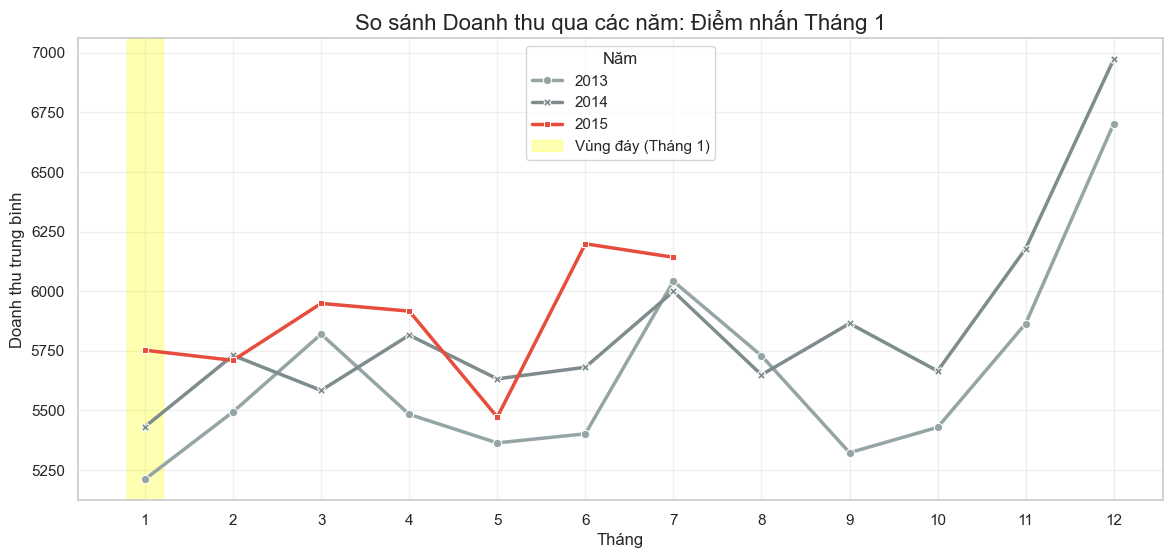

In [19]:
plt.figure(figsize=(14, 6))

# Vẽ biểu đồ đường
sns.lineplot(data=monthly_avg, x='Month', y='Sales', hue='Year', 
             palette=['#95a5a6', '#7f8c8d', '#e74c3c'], # Màu xám cho 2013, 2014; Màu đỏ nổi bật cho 2015
             style='Year', markers=True, dashes=False, linewidth=2.5)

# Tô đậm vùng Tháng 1 để highlight "Vùng đáy"
plt.axvspan(0.8, 1.2, color='yellow', alpha=0.3, label='Vùng đáy (Tháng 1)')

plt.title('So sánh Doanh thu qua các năm: Điểm nhấn Tháng 1', fontsize=16)
plt.ylabel('Doanh thu trung bình')
plt.xlabel('Tháng')
plt.xticks(range(1, 13))
plt.legend(title='Năm')
plt.grid(True, alpha=0.3)
plt.show()

# Biến động nhẹ nhưng xu hướng tháng 5 giảm rồi tăng lại tháng 6-7:
    + Cả 3 năm đều có chung đặc điểm: Doanh thu TB tháng 5 giảm nhẹ trước khi tăng trở lại vào hai tháng 6 và 7.
    + Giải thích khả thi:
        + Tháng 5 là giai đoạn giữa năm không có lễ hội lớn ?
        + Khách hàng chi tiêu ít lại
        + Tháng 6-7 có nhiều event (back-to-school, mid-year-sale) ?

        => Insight: Liệu có thể đẩy mạnh promo tháng 5 để tránh tụt doanh thu?

In [ ]:
# 1. Tạo bảng Pivot doanh thu trung bình (Hàng: Năm, Cột: Tháng)
monthly_sales = df_open.groupby(['Year', 'Month'])['Sales'].mean().unstack(level=1)

# 2. Tập trung vào giai đoạn giữa năm (Tháng 4, 5, 6, 7)
# Lấy thêm tháng 4 để xem tháng 5 có thực sự "giảm" so với trước đó không
mid_year_sales = monthly_sales[[4, 5, 6, 7]]

# 3. Tính % Tăng trưởng so với tháng trước (Month-over-Month Growth)
# axis=1 để tính theo hàng ngang (qua các tháng)
mom_growth = mid_year_sales.pct_change(axis=1) * 100

print(" DOANH THU TRUNG BÌNH (Sales) ")
display(mid_year_sales.style.format("{:,.0f}").background_gradient(cmap='YlOrRd', axis=1))

print("\n % TĂNG TRƯỞNG SO VỚI THÁNG TRƯỚC (%) ")
# Highlight các giá trị âm (giảm) bằng màu đỏ, dương (tăng) bằng màu xanh
def color_negative_red(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

display(mom_growth.style.applymap(color_negative_red).format("{:.2f}%"))

--- DOANH THU TRUNG BÌNH (Sales) ---


Month,4,5,6,7
Year,,,,
2013,"5,484","5,364","5,402","6,042"
2014,"5,816","5,633","5,682","5,999"
2015,"5,917","5,472","6,199","6,143"



--- % TĂNG TRƯỞNG SO VỚI THÁNG TRƯỚC (%) ---


C:\Users\Admin\AppData\Local\Temp\ipykernel_3328\3116457911.py:21: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  display(mom_growth.style.applymap(color_negative_red).format("{:.2f}%"))


Month,4,5,6,7
Year,,,,
2013,nan%,-2.18%,0.71%,11.85%
2014,nan%,-3.15%,0.87%,5.59%
2015,nan%,-7.52%,13.29%,-0.91%


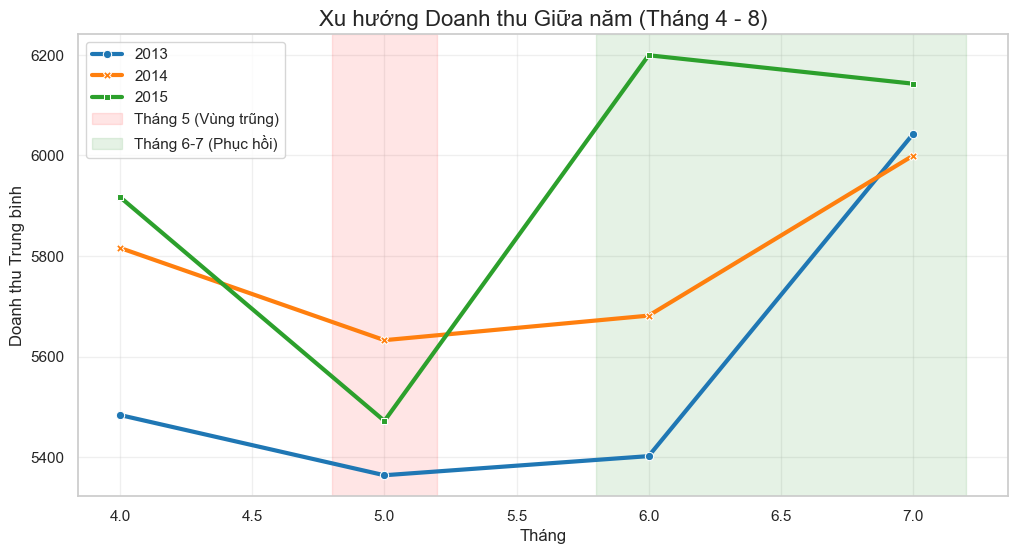

In [21]:
# Chuẩn bị dữ liệu cho biểu đồ (Unpivot/Melt)
mid_year_long = mid_year_sales.reset_index().melt(id_vars='Year', var_name='Month', value_name='Sales')

plt.figure(figsize=(12, 6))

# Vẽ biểu đồ đường
sns.lineplot(data=mid_year_long, x='Month', y='Sales', hue='Year', 
             palette='tab10', style='Year', markers=True, dashes=False, linewidth=3)

# Đánh dấu vùng Tháng 5 để làm nổi bật sự sụt giảm
plt.axvspan(4.8, 5.2, color='red', alpha=0.1, label='Tháng 5 (Vùng trũng)')
# Đánh dấu vùng Tháng 6-7 phục hồi
plt.axvspan(5.8, 7.2, color='green', alpha=0.1, label='Tháng 6-7 (Phục hồi)')

plt.title('Xu hướng Doanh thu Giữa năm (Tháng 4 - 8)', fontsize=16)
plt.xlabel('Tháng')
plt.ylabel('Doanh thu Trung bình')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Liệu có phải doanh thu tháng 5 giảm do ít triển khai các chương trình quảng bá?

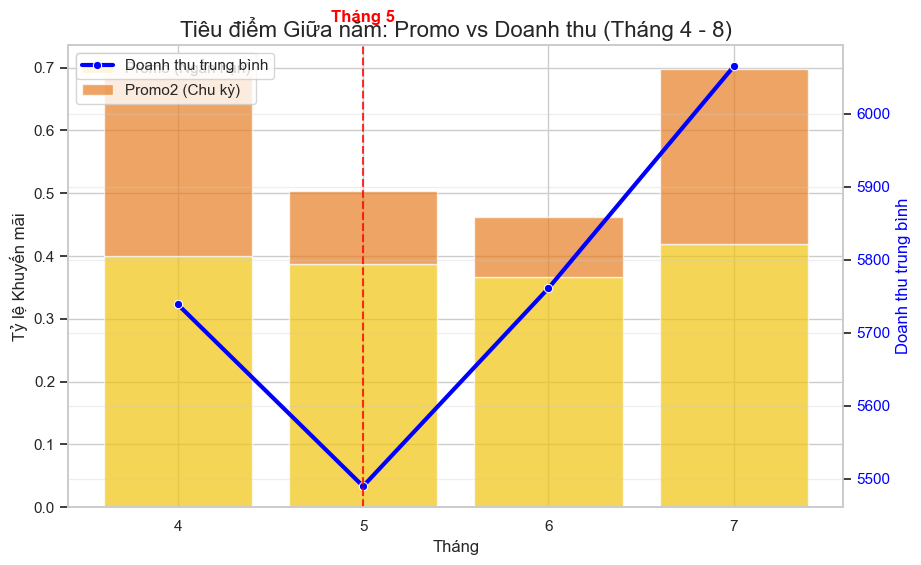

--- SỐ LIỆU CHI TIẾT THÁNG 4 - 8 ---


,Promo,IsPromo2Month,Sales
Month,,,
4,0.400000,0.300448,5738.866916
5,0.387097,0.116592,5489.639973
6,0.366667,0.095067,5760.964375
7,0.419355,0.278989,6064.915711


In [ ]:
# BƯỚC 1: TẠO BIẾN "Promo2Active" 
# Logic: Cửa hàng có tham gia Promo2 (Promo2=1) VÀ Tháng hiện tại nằm trong chu kỳ (PromoInterval)

# Hàm kiểm tra xem tháng hiện tại có nằm trong PromoInterval không
def is_promo2_active(row):
    if row['Promo2'] == 0:
        return 0
    if row['PromoInterval'] == 0: # Trường hợp không có thông tin interval
        return 0
    
    # Map tên tháng sang số để so sánh (VD: Jan -> 1, Apr -> 4...)
    month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    
    current_month_str = month_map[row['Month']]
    
    # Kiểm tra xem tháng hiện tại có trong chuỗi Interval không (VD: "Jan,Apr,Jul,Oct")
    if current_month_str in row['PromoInterval']:
        return 1
    else:
        return 0

# Để nhanh hơn, ta dùng list comprehension thay vì apply
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Tạo cột ánh xạ tên tháng cho cả dataset trước
df_open['MonthStr'] = df_open['Month'].map(month_map)

# Điều kiện: Có Promo2 VÀ (Tên tháng nằm trong chuỗi Interval)
# Lưu ý: Cách check chuỗi vector hóa đơn giản nhất là dùng apply cho cột PromoInterval vì cấu trúc chuỗi
df_open['IsPromo2Month'] = df_open.apply(lambda x: 1 if (x['Promo2'] == 1 and x['MonthStr'] in str(x['PromoInterval'])) else 0, axis=1)


# BƯỚC 2: TÍNH TOÁN TỶ LỆ HOẠT ĐỘNG CỦA CẢ 2 LOẠI 
combined_promo = df_open.groupby('Month')[['Promo', 'IsPromo2Month', 'Sales']].mean()

# ---

#  BƯỚC 1: LỌC DỮ LIỆU (CHỈ LẤY THÁNG 4 - 8) 
# Sử dụng .loc[4:8] để lấy các dòng từ chỉ mục 4 đến 8
combined_promo_focus = combined_promo.loc[4:7]

#  BƯỚC 2: VẼ BIỂU ĐỒ TẬP TRUNG (ZOOM-IN) 
fig, ax1 = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ cột chồng (Stacked Bar) cho dữ liệu đã lọc
ax1.bar(combined_promo_focus.index, combined_promo_focus['Promo'], label='Promo (Ngắn hạn)', color='#f1c40f', alpha=0.7)
ax1.bar(combined_promo_focus.index, combined_promo_focus['IsPromo2Month'], bottom=combined_promo_focus['Promo'], label='Promo2 (Chu kỳ)', color='#e67e22', alpha=0.7)

ax1.set_ylabel('Tỷ lệ Khuyến mãi', fontsize=12)
ax1.set_xlabel('Tháng', fontsize=12)
ax1.legend(loc='upper left')

# Vẽ đường doanh thu cho dữ liệu đã lọc
ax2 = ax1.twinx()
sns.lineplot(x=combined_promo_focus.index, y=combined_promo_focus['Sales'], color='blue', marker='o', linewidth=3, ax=ax2, label='Doanh thu trung bình')
ax2.set_ylabel('Doanh thu trung bình', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

# Đánh dấu Tháng 5 
if 5 in combined_promo_focus.index:
    plt.axvline(x=5, color='red', linestyle='--', alpha=0.8)
    # Điều chỉnh vị trí text cho phù hợp với khung nhìn mới
    plt.text(5, combined_promo_focus['Sales'].max() * 1.01, 'Tháng 5', ha='center', color='red', fontweight='bold')

plt.title('Tiêu điểm Giữa năm: Promo vs Doanh thu (Tháng 4 - 8)', fontsize=16)
plt.xticks(range(4, 8)) # Chỉ hiện thị trục X từ 4 đến 8
plt.grid(True, alpha=0.3)
plt.show()

# In bảng số liệu chi tiết giai đoạn này
print("--- SỐ LIỆU CHI TIẾT THÁNG 4 - 8 ---")
display(combined_promo_focus[['Promo', 'IsPromo2Month', 'Sales']].style.background_gradient(cmap='Oranges', subset=['Promo', 'IsPromo2Month']))

- Trả lời: Thực tế cho thấy doanh thu TB của tháng 5 không phải là do thiếu các chương trình khuyến mãi. 

- Nguyên nhân: Vì tỉ lệ áp dụng chương trình khuyến mại vào tháng 5 không quá thấp, 38% với Promo và 11% với Promo2, thậm chí nhỉnh hơn so với tháng 6 nhưng doanh thu TB vẫn thấp hơn.

=> Insight: Đây là do nhu cầu mua sắm tự nhiên giảm, vì vậy chuỗi cửa hàng nên tập trung vào giữ chân khách hàng trung thành hoặc chạy các loại hình khuyến mại kích cầu mạnh hơn (ví dụ: mua 1 tặng 1) thay vì chương trình khuyến mại thông thường.

Tổng số ngày lễ trong tháng 5: 9
Danh sách các ngày lễ trong tháng 5:


,Date,StateHoliday
882295,2013-05-01,a
873375,2013-05-09,a
861110,2013-05-20,a
849960,2013-05-30,a
475320,2014-05-01,a
444100,2014-05-29,a
101465,2015-05-01,a
86970,2015-05-14,a
74705,2015-05-25,a


Doanh thu trong các ngày lễ tháng 5:


,Date,Sales
0,2013-05-01,200972
1,2013-05-09,233215
2,2013-05-20,253936
3,2013-05-30,685181
4,2014-05-01,238077
5,2014-05-29,292254
6,2015-05-01,264231
7,2015-05-14,289247
8,2015-05-25,299473


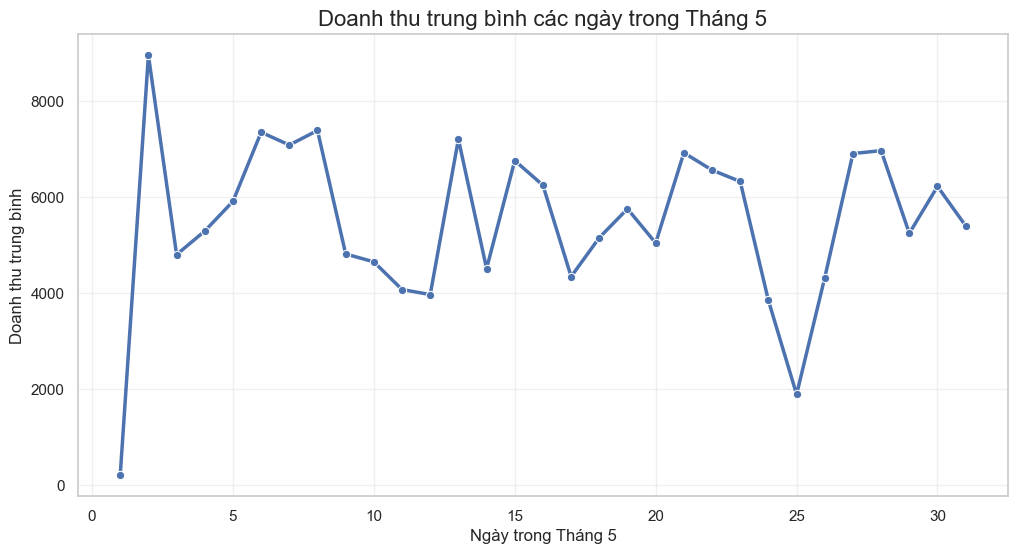

In [33]:
# Kiểm tra ngày lễ trong tháng 5
may_holidays = df_open[(df_open['Month'] == 5) & (df_open['StateHoliday'] != '0')]
print(f"Tổng số ngày lễ trong tháng 5: {may_holidays['Date'].nunique()}")
print("Danh sách các ngày lễ trong tháng 5:")
display(may_holidays[['Date', 'StateHoliday']].drop_duplicates().sort_values(by='Date'))

# Kiểm tra doanh thu trong các ngày lễ này
print("Doanh thu trong các ngày lễ tháng 5:")
display(may_holidays[['Date', 'Sales']].groupby('Date').sum().reset_index().sort_values(by='Date'))

# Vẽ doanh thu các ngày trong tháng 5
plt.figure(figsize=(12, 6))
may_daily_sales = df_open[df_open['Month'] == 5].groupby('Day')['Sales'].mean().reset_index()
sns.lineplot(data=may_daily_sales, x='Day', y='Sales', marker='o', linewidth=2.5)
plt.title('Doanh thu trung bình các ngày trong Tháng 5', fontsize=16)
plt.xlabel('Ngày trong Tháng 5')
plt.ylabel('Doanh thu trung bình')
plt.grid(True, alpha=0.3)
plt.show()

In [35]:
# Kiểm tra cửa hàng đóng cửa vào ngày lễ trong tháng 5 không
closed_holidays = df_open[(df_open['Month'] == 5) & (df_open['StateHoliday'] != '0') & (df_open['Open'] == 0)]
print(f"Tổng số ngày lễ trong tháng 5 mà cửa hàng đóng cửa: {closed_holidays['Date'].nunique()}")
if not closed_holidays.empty:
    print("Danh sách các ngày lễ đóng cửa trong tháng 5:")
    display(closed_holidays[['Date', 'StateHoliday', 'Open']].drop_duplicates().sort_values(by='Date'))

Tổng số ngày lễ trong tháng 5 mà cửa hàng đóng cửa: 9
Danh sách các ngày lễ đóng cửa trong tháng 5:


,Date,StateHoliday,Open
882295,2013-05-01,a,0
873375,2013-05-09,a,0
861110,2013-05-20,a,0
849960,2013-05-30,a,0
475320,2014-05-01,a,0
444100,2014-05-29,a,0
101465,2015-05-01,a,0
86970,2015-05-14,a,0
74705,2015-05-25,a,0


C:\Users\Admin\AppData\Local\Temp\ipykernel_3328\4079001288.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_counts, x='Month', y='HolidayCount', palette='viridis')


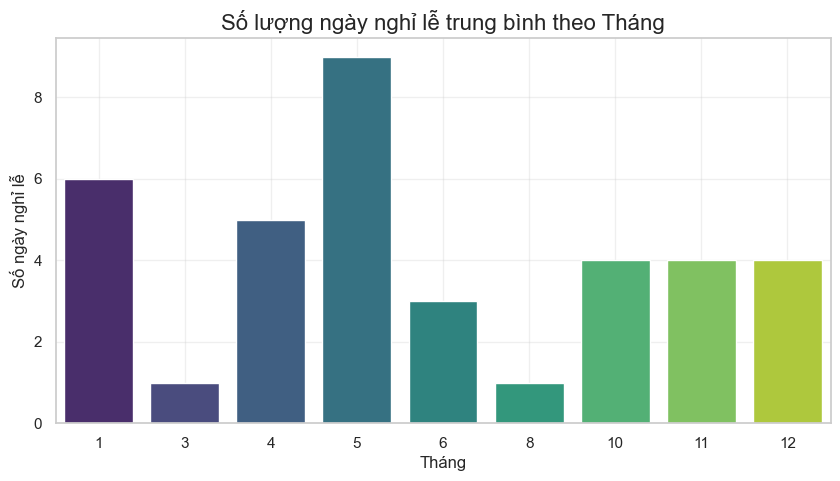

In [36]:
# Kiểm tra số lượng trung bình ngày nghỉ lễ trong các tháng
holiday_counts = df_open[df_open['StateHoliday'] != '0'].groupby('Month')['Date'].nunique().reset_index()
holiday_counts.columns = ['Month', 'HolidayCount']
plt.figure(figsize=(10, 5))
sns.barplot(data=holiday_counts, x='Month', y='HolidayCount', palette='viridis')
plt.title('Số lượng ngày nghỉ lễ trung bình theo Tháng', fontsize=16)
plt.xlabel('Tháng')
plt.ylabel('Số ngày nghỉ lễ')
plt.grid(True, alpha=0.3)
plt.show()

--- SO SÁNH HIỆU SUẤT THÁNG 5 VS THÁNG 7 ---


,Total_Sales,Open_Days,Avg_Sales_Per_Open_Day
Month,,,
4,"191,965,098",27243.7 ngày,"7,052"
5,"189,749,406",26701.0 ngày,"7,111"
6,"192,704,258",27525.3 ngày,"7,005"
7,"198,353,068",28529.0 ngày,"6,950"


C:\Users\Admin\AppData\Local\Temp\ipykernel_3328\2002086003.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_perf, x='Month', y='Total_Sales', errorbar=None, alpha=0.5, ax=ax1, palette='pastel')


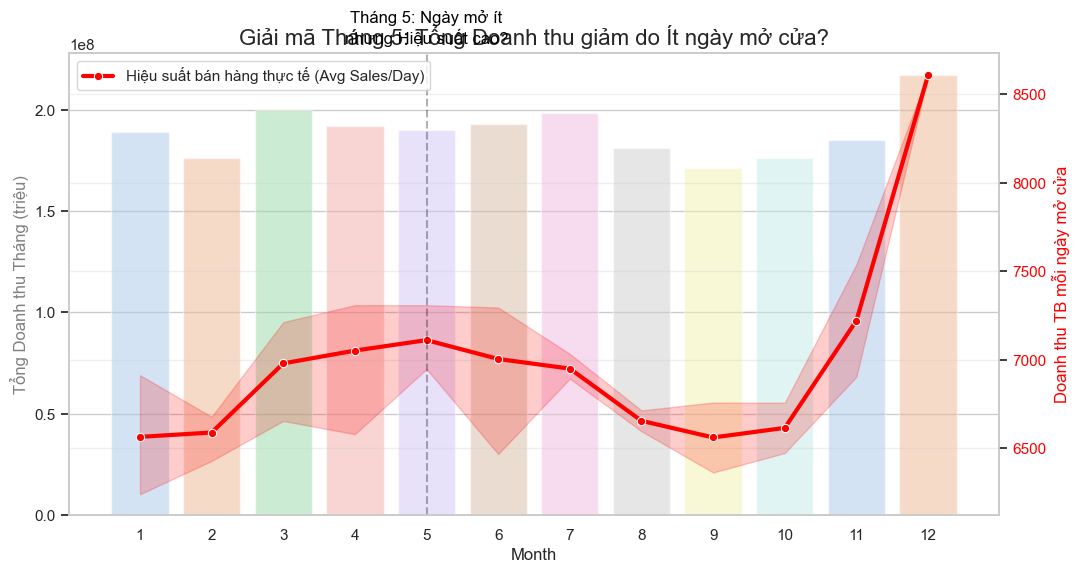

In [ ]:
# --- BƯỚC 1: TÍNH TOÁN CÁC CHỈ SỐ THEO THÁNG ---
# Sử dụng df_merge (bộ dữ liệu gốc chứa cả ngày đóng cửa) để đếm chính xác số ngày mở
monthly_perf = df_open.groupby(['Year', 'Month']).agg(
    Total_Sales=('Sales', 'sum'),       # Tổng doanh thu đem về
    Open_Days=('Open', 'sum'),          # Tổng số ngày thực sự mở cửa bán
    Avg_Sales_Per_Open_Day=('Sales', lambda x: x[x > 0].mean()) # Doanh thu trung bình chỉ tính trên ngày mở
).reset_index()

# Lọc lấy các tháng quan trọng (4, 5, 6, 7) để so sánh
focus_months = monthly_perf[monthly_perf['Month'].isin([4, 5, 6, 7])]

print("--- SO SÁNH HIỆU SUẤT THÁNG 5 VS THÁNG 7 ---")
display(focus_months.groupby('Month')[['Total_Sales', 'Open_Days', 'Avg_Sales_Per_Open_Day']].mean().style.format({
    'Total_Sales': '{:,.0f}',
    'Open_Days': '{:.1f} ngày',
    'Avg_Sales_Per_Open_Day': '{:,.0f}'
}).background_gradient(cmap='RdYlGn', subset=['Total_Sales', 'Avg_Sales_Per_Open_Day']))


# --- BƯỚC 2: TRỰC QUAN HÓA HAI TRỤC (QUAN TRỌNG) ---
# Biểu đồ này sẽ chứng minh: Tuy Tổng doanh thu (Cột) thấp, nhưng Sức bán (Đường) vẫn tốt.

fig, ax1 = plt.subplots(figsize=(12, 6))

# Trục 1 (Cột): Tổng doanh thu (Total Monthly Revenue)
# Dùng hue='Month' để tô màu khác nhau cho dễ nhìn, nhưng set legend=False để gọn
sns.barplot(data=monthly_perf, x='Month', y='Total_Sales', errorbar=None, alpha=0.5, ax=ax1, palette='pastel')
ax1.set_ylabel('Tổng Doanh thu Tháng (triệu)', color='gray', fontsize=12)
ax1.set_title('Giải mã Tháng 5: Tổng Doanh thu giảm do Ít ngày mở cửa?', fontsize=16)

# Trục 2 (Đường): Doanh thu trung bình mỗi ngày mở (Sales per Open Day)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_perf, x=monthly_perf['Month']-1, y='Avg_Sales_Per_Open_Day', 
             color='red', marker='o', linewidth=3, ax=ax2, label='Hiệu suất bán hàng thực tế (Avg Sales/Day)')
ax2.set_ylabel('Doanh thu TB mỗi ngày mở cửa', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Highlight tháng 5
plt.axvline(x=4, color='black', linestyle='--', alpha=0.3) # Index 4 là tháng 5
plt.text(4, monthly_perf['Avg_Sales_Per_Open_Day'].max()*1.02, 'Tháng 5: Ngày mở ít\nnhưng Hiệu suất cao?', ha='center', color='black')

plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

# Doanh thu các ngày trong tuần diễn ra thế nào?

C:\Users\Admin\AppData\Local\Temp\ipykernel_3328\2096626131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='Sales', data=df_open, estimator=np.mean, errorbar=None, palette="muted")


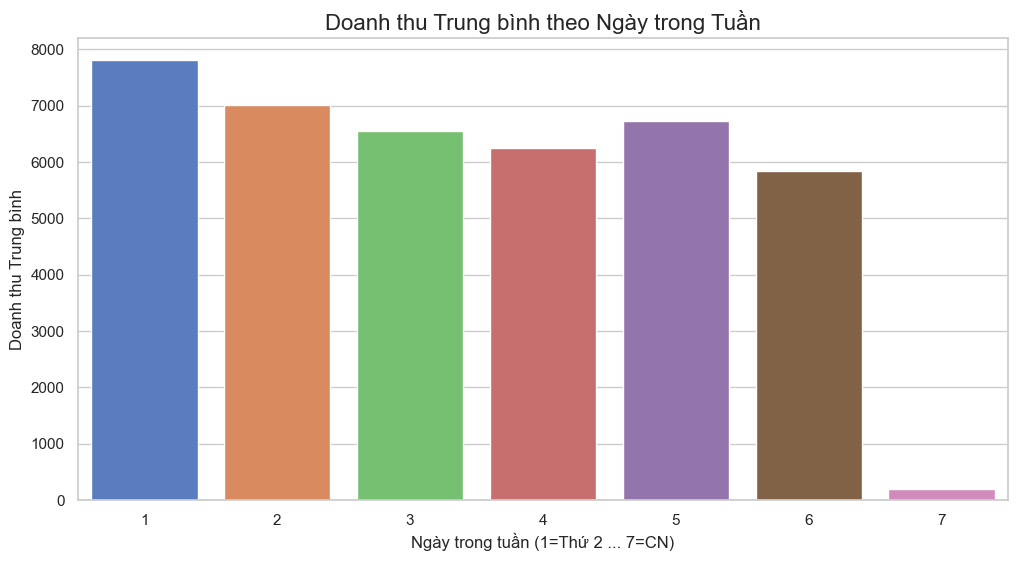

In [23]:
# Doanh thu trung bình theo Ngày trong tuần
plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='Sales', data=df_open, estimator=np.mean, errorbar=None, palette="muted")
plt.title('Doanh thu Trung bình theo Ngày trong Tuần', fontsize=16)
plt.xlabel('Ngày trong tuần (1=Thứ 2 ... 7=CN)', fontsize=12) # Kiểm tra lại quy ước trong dữ liệu của bạn
plt.ylabel('Doanh thu Trung bình', fontsize=12)
plt.show()

1. Các quan sát chính từ dữ liệu (Data Observations)
- Ngày bán tốt nhất: Thứ Hai (Day 1)

- Đây là cột cao nhất trên biểu đồ (~7.800).

- Khách hàng có xu hướng mua sắm dồn dập vào đầu tuần.

- Ngày "chết": Chủ Nhật (Day 7)

- Doanh thu gần như bằng 0 (cột màu tím hồng rất thấp).

=> Điều này phản ánh thực tế: Hầu hết các cửa hàng Rossmann (ở Châu Âu) đóng cửa vào Chủ Nhật theo luật lao động/văn hóa, chỉ một số rất ít mở cửa (có thể ở nhà ga, sân bay).

- Hiệu ứng cuối tuần: Thứ Sáu (Day 5)

- Sau khi giảm dần từ thứ 3 đến thứ 5, doanh thu bật tăng trở lại vào Thứ Sáu (cột màu tím, ~6.800).

- Đây là thời điểm mọi người mua sắm tích trữ cho 2 ngày nghỉ cuối tuần.

- Xu hướng giảm nhiệt giữa tuần:

- Doanh thu có xu hướng giảm nhẹ từ Thứ 3 (Day 2) xuống Thứ 5 (Day 4). Thứ 5 (Thursday) dường như là ngày thấp điểm nhất của các ngày trong tuần (weekdays).

2. Giải thích ý nghĩa (Business Insights)
- Hiệu ứng "Bù đắp sau ngày nghỉ" (Post-Sunday Recovery):

- Việc Thứ 2 có doanh thu cao nhất liên quan trực tiếp đến việc Chủ Nhật đóng cửa. Nhu cầu bị nén lại trong ngày Chủ Nhật sẽ "bung" ra vào ngày Thứ Hai ngay khi cửa hàng mở cửa lại.

- Tâm lý mua sắm cuối tuần:

- Đỉnh phụ vào Thứ 6 cho thấy tâm lý chuẩn bị cho cuối tuần (tiệc tùng, nghỉ ngơi, gia đình tụ tập).

3. Đề xuất hành động (Actionable Recommendations)
- Dựa trên biểu đồ này, bạn có thể đề xuất các chiến lược sau:

    + Quản lý nhân sự (Staffing):

    + Thứ 2: Cần bố trí số lượng nhân viên đông nhất (full shifts) để xử lý lượng khách ồ ạt sau ngày nghỉ, tránh để khách chờ lâu gây mất doanh thu.

    + Thứ 6: Cũng cần tăng cường nhân sự, đặc biệt vào khung giờ chiều/tối (khung giờ mọi người thường đi mua sắm sau 1 tuần làm việc, học tập)

- Quản lý tồn kho (Inventory):

- Hàng hóa cần được nhập và lên kệ đầy đủ trước sáng Thứ 2 để đón đợt khách lớn nhất tuần. Tránh tình trạng Thứ 2 khách đông mà kệ hàng trống.

- Chiến lược Khuyến mãi (Promotion):

- Kích cầu ngày vắng: Thứ 4 và Thứ 5 đang là vùng trũng của tuần. Có thể chạy các chương trình Flash Sale giữa tuần hoặc "Happy Thursday" để kéo doanh thu của những ngày này lên, san phẳng biểu đồ.

- Tận dụng lưu lượng Thứ 2: Không cần giảm giá quá sâu vào Thứ 2 vì nhu cầu tự nhiên đã cao. Thay vào đó, tập trung vào việc Upsell/Cross-sell (bán kèm) vì lượng traffic (khách vào) đang rất lớn.

# Liệu Chủ Nhật có phải là ngày "chết" với mọi loại cửa hàng?

--- TỶ LỆ MỞ CỬA VÀO CHỦ NHẬT THEO LOẠI CỬA HÀNG ---


,% Mở cửa Chủ Nhật
StoreType,
a,1.401560
b,98.401421
c,0.000000
d,0.622108


C:\Users\Admin\AppData\Local\Temp\ipykernel_3328\2218604633.py:21: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x='DayOfWeek', y='Sales', hue='StoreType', data=df_open,


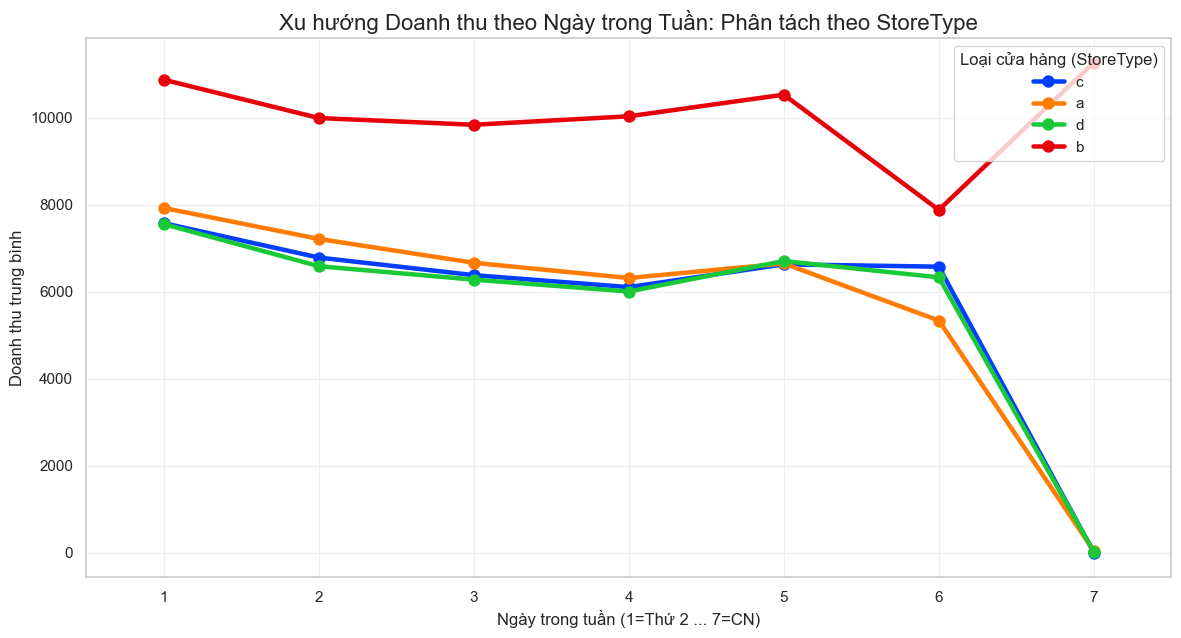

In [24]:
# --- BƯỚC 1: KIỂM TRA TỶ LỆ MỞ CỬA VÀO CHỦ NHẬT (Dùng df_merge gốc chứa cả ngày đóng cửa) ---
# Lọc lấy tất cả các ngày là Chủ Nhật (DayOfWeek = 7)
all_sundays = df_merge[df_merge['DayOfWeek'] == 7]

# Tính tỷ lệ phần trăm số ngày mở cửa (Open = 1) trên tổng số ngày Chủ Nhật theo từng loại cửa hàng
sunday_open_rates = all_sundays.groupby('StoreType')['Open'].mean() * 100

print("--- TỶ LỆ MỞ CỬA VÀO CHỦ NHẬT THEO LOẠI CỬA HÀNG ---")
# Hiển thị kết quả, dùng màu để highlight
display(sunday_open_rates.to_frame(name='% Mở cửa Chủ Nhật').style.background_gradient(cmap='Greens'))


# --- BƯỚC 2: VẼ BIỂU ĐỒ XU HƯỚNG TUẦN THEO TỪNG LOẠI CỬA HÀNG (Dùng df_open) ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

# Sử dụng tham số 'hue' để tách màu theo StoreType
# Dùng pointplot để thấy rõ sự biến động hơn là barplot
sns.pointplot(x='DayOfWeek', y='Sales', hue='StoreType', data=df_open, 
              palette='bright', errorbar=None, markers='o', scale=1.2)

plt.title('Xu hướng Doanh thu theo Ngày trong Tuần: Phân tách theo StoreType', fontsize=16)
plt.xlabel('Ngày trong tuần (1=Thứ 2 ... 7=CN)', fontsize=12)
plt.ylabel('Doanh thu trung bình', fontsize=12)
plt.legend(title='Loại cửa hàng (StoreType)', loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()


- Nhìn bảng "Tỷ lệ mở cửa Chủ Nhật":

    + StoreType 'b' có tỷ lệ mở cửa vào ngày chủ nhật khoảng 98%, rất cao so với 3 loại cửa hàng còn lại với 1.4% của a, 0.6% của d và c đóng cửa hoàn toàn vào ngày Chủ Nhật.

=> Kết luận: Xu hướng "Chủ Nhật chết" KHÔNG ĐÚNG với cửa hàng loại 'b'. Cửa hàng loại 'b' là ngoại lệ.

- Nhìn biểu đồ đường (Pointplot):

    + Ta thấy 3 đường (tượng trưng cho a, c, d) có hình dạng giống biểu đồ chung: Cao vào Thứ 2, giảm dần và chạm đáy vào Chủ Nhật.

    + Riêng đường của StoreType 'b' sẽ có hình dáng rất khác, nó tăng vọt vào Chủ Nhật thay vì giảm?

=> Insight tiềm năng (Dự đoán dựa trên tập dữ liệu Rossmann):
StoreType 'b' thường là các cửa hàng nằm trong Nhà ga hoặc Sân bay. Đặc điểm của chúng là:

- Mở cửa xuyên suốt tuần (kể cả Chủ Nhật).

    - Doanh thu Chủ Nhật có thể còn cao hơn ngày thường do lượng khách du lịch/di chuyển đông.

=> Chiến lược hành động (Actionable Insight):

- Không được áp dụng chính sách "Cắt giảm nhân sự Chủ Nhật" cho cửa hàng loại 'b'.

- Ngược lại, cửa hàng loại 'b' cần ưu tiên hàng hóa và nhân sự cho cuối tuần.

In [25]:
# --- BƯỚC 1: CHUẨN BỊ SỐ LIỆU ---
# Tính doanh thu trung bình theo ngày trong tuần
daily_sales = df_open.groupby('DayOfWeek')['Sales'].mean()

# Tính tỷ lệ mở cửa của Chủ Nhật (dựa trên dữ liệu gốc df_merge để tính cả ngày đóng cửa)
sunday_open_rate = df_merge[df_merge['DayOfWeek'] == 7]['Open'].mean() * 100

# --- BƯỚC 2: KIỂM TRA INSIGHT "BÙ ĐẮP SAU NGÀY NGHỈ" (POST-SUNDAY RECOVERY) ---
# Doanh thu Thứ 2
monday_sales = daily_sales[1]

# Doanh thu trung bình các ngày giữa tuần (Thứ 3, 4, 5) để làm mốc so sánh "ngày thường"
midweek_sales = daily_sales[[2, 3, 4]].mean()

# Tính % tăng trưởng của Thứ 2 so với ngày thường
recovery_growth = (monday_sales - midweek_sales) / midweek_sales * 100

print("--- 1. KIỂM TRA HIỆU ỨNG BÙ ĐẮP SAU NGÀY NGHỈ (THỨ 2) ---")
print(f"Tỷ lệ cửa hàng mở cửa vào Chủ Nhật: {sunday_open_rate:.2f}%")
print(f"Doanh thu trung bình Thứ 2:         {monday_sales:,.0f}")
print(f"Doanh thu trung bình Giữa tuần:     {midweek_sales:,.0f} (Thứ 3-5)")
print(f"=> Mức tăng trưởng 'Bù đắp':        +{recovery_growth:.2f}%")

if sunday_open_rate < 5 and recovery_growth > 10:
    print("=> KẾT LUẬN: ĐÚNG. Chủ Nhật hầu như đóng cửa và Thứ 2 tăng vọt so với ngày thường.")
else:
    print("=> KẾT LUẬN: CẦN XEM XÉT LẠI. Dữ liệu không ủng hộ mạnh mẽ giả thuyết này.")


# --- BƯỚC 3: KIỂM TRA INSIGHT "TÂM LÝ MUA SẮM CUỐI TUẦN" (THỨ 6) ---
friday_sales = daily_sales[5]
thursday_sales = daily_sales[4] # So với ngày liền trước

# Tính % tăng trưởng của Thứ 6 so với Thứ 5
friday_lift = (friday_sales - thursday_sales) / thursday_sales * 100

print("\n--- 2. KIỂM TRA TÂM LÝ MUA SẮM CUỐI TUẦN (THỨ 6) ---")
print(f"Doanh thu trung bình Thứ 5:         {thursday_sales:,.0f}")
print(f"Doanh thu trung bình Thứ 6:         {friday_sales:,.0f}")
print(f"=> Mức tăng trưởng Thứ 6 vs Thứ 5:  +{friday_lift:.2f}%")

if friday_lift > 5:
    print("=> KẾT LUẬN: ĐÚNG. Có sự tăng trưởng đáng kể vào Thứ 6 (chuẩn bị cho cuối tuần).")
else:
    print("=> KẾT LUẬN: SAI. Thứ 6 không chênh lệch nhiều so với Thứ 5.")

# --- (NÂNG CAO) KIỂM ĐỊNH THỐNG KÊ (T-TEST) ---
# Để chắc chắn sự khác biệt không phải do ngẫu nhiên
print("\n--- (Nâng cao) Kiểm định thống kê ---")
sales_mon = df_open[df_open['DayOfWeek'] == 1]['Sales']
sales_tue_thu = df_open[df_open['DayOfWeek'].isin([2,3,4])]['Sales']

import scipy.stats as stats
t_stat, p_val = stats.ttest_ind(sales_mon, sales_tue_thu, equal_var=False)
if p_val < 0.05:
    print(f"Kiểm định T-test xác nhận sự khác biệt giữa Thứ 2 và Ngày thường là CÓ Ý NGHĨA THỐNG KÊ (p-value={p_val:.2e} < 0.05).")
else:
    print("Sự khác biệt chưa đủ ý nghĩa thống kê.")

--- 1. KIỂM TRA HIỆU ỨNG BÙ ĐẮP SAU NGÀY NGHỈ (THỨ 2) ---
Tỷ lệ cửa hàng mở cửa vào Chủ Nhật: 2.48%
Doanh thu trung bình Thứ 2:         7,809
Doanh thu trung bình Giữa tuần:     6,603 (Thứ 3-5)
=> Mức tăng trưởng 'Bù đắp':        +18.27%
=> KẾT LUẬN: ĐÚNG. Chủ Nhật hầu như đóng cửa và Thứ 2 tăng vọt so với ngày thường.

--- 2. KIỂM TRA TÂM LÝ MUA SẮM CUỐI TUẦN (THỨ 6) ---
Doanh thu trung bình Thứ 5:         6,248
Doanh thu trung bình Thứ 6:         6,723
=> Mức tăng trưởng Thứ 6 vs Thứ 5:  +7.61%
=> KẾT LUẬN: ĐÚNG. Có sự tăng trưởng đáng kể vào Thứ 6 (chuẩn bị cho cuối tuần).

--- (Nâng cao) Kiểm định thống kê ---
Kiểm định T-test xác nhận sự khác biệt giữa Thứ 2 và Ngày thường là CÓ Ý NGHĨA THỐNG KÊ (p-value=0.00e+00 < 0.05).


# Tác động của ngày nghĩ lễ lớn đối với hành vi mua sắm của khách hàng?

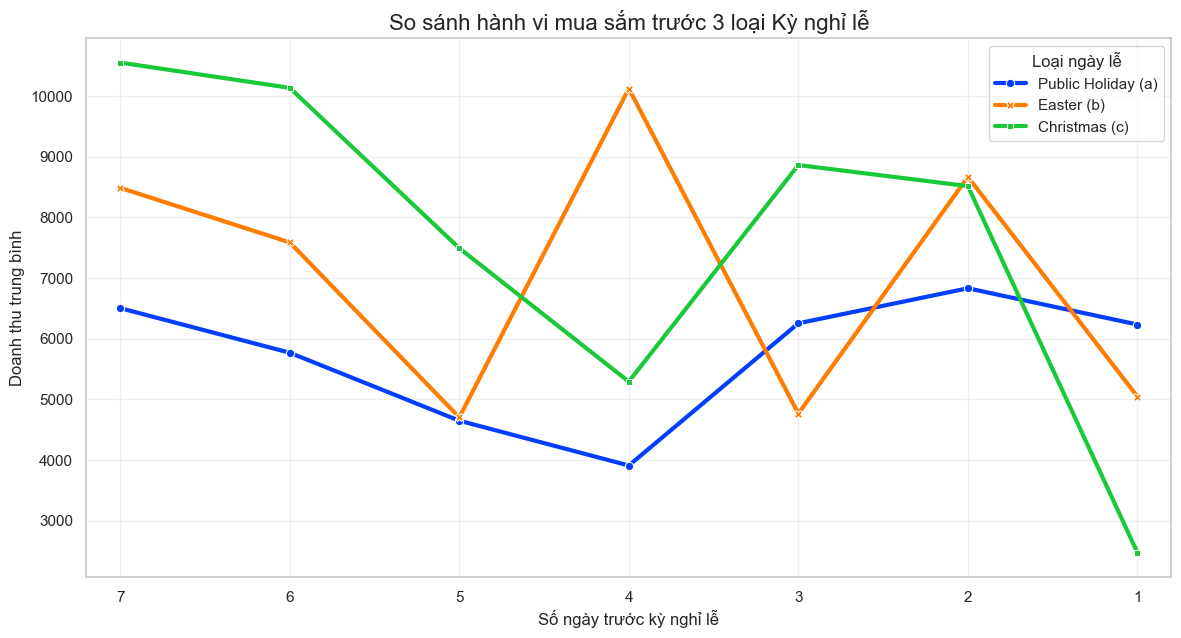

--- DOANH THU TRUNG BÌNH CHI TIẾT (Đơn vị: Tiền tệ) ---


HolidayType,Christmas (c),Easter (b),Public Holiday (a)
DaysBefore,,,
7,"10,550","8,486","6,503"
6,"10,134","7,586","5,768"
5,"7,492","4,703","4,648"
4,"5,292","10,122","3,909"
3,"8,862","4,765","6,253"
2,"8,514","8,666","6,831"
1,"2,474","5,046","6,233"


In [ ]:
# BƯỚC 1: CHUẨN BỊ DỮ LIỆU 
# Định nghĩa các loại ngày lễ và tên gọi để hiển thị cho đẹp
holiday_map = {'a': 'Public Holiday (a)', 'b': 'Easter (b)', 'c': 'Christmas (c)'}
results = []

# BƯỚC 2: TÍNH TOÁN VÒNG LẶP 
for h_code, h_name in holiday_map.items():
    # Lấy danh sách các ngày diễn ra loại lễ này từ dữ liệu gốc (df_merge)
    # (Dùng df_merge để lấy cả những ngày đóng cửa)
    specific_holiday_dates = df_merge[df_merge['StateHoliday'] == h_code]['Date'].unique()
    specific_holiday_dates = pd.to_datetime(specific_holiday_dates)
    
    # Xét khung thời gian 7 ngày trước lễ
    for days_before in range(1, 8):
        # Tìm ngày tương ứng: Lấy ngày lễ TRỪ đi số ngày (VD: 25/12 - 1 ngày = 24/12)
        target_dates = [h_date - pd.Timedelta(days=days_before) for h_date in specific_holiday_dates]
        
        # Tính doanh thu trung bình của những ngày này trong tập dữ liệu mở cửa (df_open)
        # Chỉ tính những cửa hàng có mở cửa
        avg_sales = df_open[df_open['Date'].isin(target_dates)]['Sales'].mean()
        
        results.append({
            'HolidayType': h_name,
            'DaysBefore': days_before,
            'AvgSales': avg_sales
        })

# Tạo DataFrame kết quả
df_trend_detailed = pd.DataFrame(results)

# --- BƯỚC 3: TRỰC QUAN HÓA SO SÁNH ---
plt.figure(figsize=(14, 7))

# Vẽ biểu đồ đường để thấy rõ xu hướng của từng loại lễ
# hue='HolidayType' để tách 3 đường màu khác nhau
sns.lineplot(data=df_trend_detailed, x='DaysBefore', y='AvgSales', hue='HolidayType', 
             style='HolidayType', markers=True, dashes=False, linewidth=3, palette='bright')

# Đảo ngược trục X để hiển thị từ 7 ngày trước -> 1 ngày trước (theo dòng thời gian)
plt.xlim(7.2, 0.8) 

plt.title('So sánh hành vi mua sắm trước 3 loại Kỳ nghỉ lễ', fontsize=16)
plt.xlabel('Số ngày trước kỳ nghỉ lễ', fontsize=12)
plt.ylabel('Doanh thu trung bình', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Loại ngày lễ')

plt.show()

# --- BƯỚC 4: IN BẢNG SỐ LIỆU CHI TIẾT (PIVOT TABLE) ---
# Chuyển đổi bảng để dễ so sánh con số
pivot_trend = df_trend_detailed.pivot(index='DaysBefore', columns='HolidayType', values='AvgSales')
# Sắp xếp index giảm dần (từ 7 về 1)
pivot_trend = pivot_trend.sort_index(ascending=False)

print("--- DOANH THU TRUNG BÌNH CHI TIẾT (Đơn vị: Tiền tệ) ---")
display(pivot_trend.style.format("{:,.0f}").background_gradient(cmap='YlOrRd'))

#  PHÂN TÍCH CHI TIẾT: HÀNH VI MUA SẮM TRƯỚC TỪNG LOẠI KỲ NGHỈ LỄ

Biểu đồ so sánh cho thấy 3 hành vi mua sắm hoàn toàn trái ngược nhau giữa các loại ngày lễ. Điều này chứng minh rằng việc gộp chung tất cả vào một biến "Holiday" đơn thuần sẽ làm sai lệch kết quả dự báo của mô hình Machine Learning.

Dưới đây là phân tích cụ thể cho từng loại:

### 1.  Giáng sinh (Christmas - Mã 'c'): Chiến thuật "Người chạy Marathon"
* **Hành vi:** * Doanh thu đạt **đỉnh cao nhất ngay từ 7 ngày trước lễ** (vượt mốc 10,500). 
    * Sau đó, sức mua giảm dần đều và có một cú **"rơi tự do"** vào ngày sát lễ (Day 1).
* **Tâm lý khách hàng:** * Khách hàng chuẩn bị cho Giáng sinh từ rất sớm (mua quà tặng, đồ trang trí, thực phẩm khô). 
    * Đến ngày sát lễ (Day 1), hầu hết mọi người đã hoàn tất việc mua sắm và về nhà nghỉ ngơi, dẫn đến doanh thu chạm đáy (thậm chí thấp hơn mức trung bình ngày thường).
* ** Kết luận:** Với Giáng sinh, **khách hàng có thói quen chuẩn bị từ sớm.**



### 2.  Lễ Phục sinh (Easter - Mã 'b'): Biểu đồ "Tàu lượn siêu tốc"
* **Hành vi:** Biến động cực mạnh hình chữ **W**.
    * **Đỉnh 1:** 4 ngày trước lễ (Doanh thu vọt lên ~10,000, ngang ngửa Giáng sinh).
    * **Đáy:** 3 ngày trước lễ (Rớt mạnh xuống ~4,800).
    * **Đỉnh 2:** 2 ngày trước lễ (Lại vọt lên ~8,500).
* **Tâm lý khách hàng:** * Lễ Phục sinh thường gắn liền với **Lễ Thứ Sáu Tuần Thánh (Good Friday)** - ngày mà các cửa hàng tại Đức/Châu Âu bắt buộc phải đóng cửa.
    * Do đó, người dân buộc phải **mua dồn** vào ngày Thứ Tư (Day 4) và Thứ Bảy (Day 2). Sự "giật cục" này là do tác động của lịch đóng cửa bắt buộc.


### 3.  Ngày lễ chung (Public Holiday - Mã 'a'): Tâm lý "Nước đến chân mới nhảy"
* **Hành vi:** Khá bình ổn, bắt đầu thấp và tăng dần nhẹ.
* **Đỉnh:** Rơi vào đúng **2 ngày trước lễ**.
* **Tâm lý khách hàng:** * Đây thường chỉ là một ngày nghỉ ngắn hạn thông thường. 
    * Mọi người chỉ mua sắm thực phẩm hoặc đồ dùng cần thiết cho ngày nghỉ đó vào thời điểm sát nút. Không có sự chuẩn bị hay tích trữ từ xa.



# ĐỀ XUẤT CHIẾN LƯỢC HÀNH ĐỘNG (ACTIONABLE INSIGHTS)

Dựa trên biểu đồ phân tích hành vi mua sắm trước lễ, dưới đây là các đề xuất cụ thể cho hoạt động Vận hành (Operations) và Marketing:

###  1. Quản lý Kho & Nhập hàng (Supply Chain)
**Với Giáng sinh (Christmas):**
    * **Chiến lược:** Hàng hóa phải đầy kệ từ **Day 10 - Day 7**. 
    * **Lưu ý:** Nếu đến Day 4 mới nhập hàng bổ sung là **quá muộn**, vì sức mua đã bắt đầu giảm sâu. Việc nhập hàng muộn sẽ dẫn đến tồn kho cao sau lễ.
**Với Phục sinh (Easter):**
    * **Chiến lược:** Kích hoạt chế độ **"Tiếp ứng nhanh" (Rapid Replenishment)**.
    * **Hành động:** Ngay sau đợt "càn quét" mua sắm vào Day 4, kho phải lập tức lấp đầy kệ để đón đợt sóng thứ hai vào Day 2. Nếu kệ hàng trống vào Day 3, cửa hàng sẽ mất trắng doanh thu của đợt cao điểm thứ hai.



### 2. Bố trí Nhân sự (Staffing)
Phân bổ ca làm việc dựa trên cường độ mua sắm thực tế thay vì cảm tính:

**Ngày sát lễ (Day 1):**
    * **Giáng sinh:** Cắt giảm nhân sự tối đa, cho nhân viên về sớm. Doanh thu lúc này rất thấp (~2,500), giữ full nhân sự là lãng phí chi phí vận hành.
    * **Lễ chung (Public Holiday):** Giữ nhân sự ở mức bình thường (Normal Level).
**Ngày cao điểm (Peak Days):**
    * **Giáng sinh:** **Full ca (100% Staffing)** vào **Day 7 và Day 6** để xử lý lượng khách mua sớm khổng lồ.
    * **Phục sinh:** **Full ca** vào **Day 4 và Day 2**. Có thể cho nhân viên nghỉ ngơi dưỡng sức vào Day 3 (ngày trũng).


### 3. Marketing & Khuyến mãi (Promo)
Chiến lược xả hàng tồn kho (Clearance Strategy):

**Kịch bản Giáng sinh:**
    * Nếu đến **Day 3** mà lượng tồn kho vẫn còn cao $\rightarrow$ **BẮT BUỘC phải xả hàng (Deep Discount/Flash Sale)** ngay lập tức.
    * **Lý do:** Sang đến Day 2 và Day 1, tâm lý khách hàng chuyển sang nghỉ ngơi, sức mua gần như bằng 0. Nếu không bán hết vào Day 3, hàng hóa sẽ trở thành **tồn kho chết (Dead Stock)** phải lưu kho qua năm sau.

# KẾT LUẬN INSIGHT:
- Tháng 11, 12 là "mỏ vàng" doanh thu do có ngày lễ Giáng Sinh.
- Tháng 1 đầu năm là vùng đáy doanh thu do nhu cầu mua sắm giảm sau lễ hội. Đây thường là giai đoạn thắt chặt chi tiêu
- Giai đoạn giữa năm ghi nhận sự sụt giảm doanh thu đáng kể vào tháng 5 dù cửa hàng có tỷ lệ áp dụng Promo không thấp => do nhu cầu mua sắm tự nhiên giảm (chỉnh lại: do ).
- Doanh thu TB trong tuần ghi nhận thứ hai đầu tuần là ngày bán hàng tốt nhất đối với mọi loại cửa hàng.
- Doanh thu TB trong tuần đạt đỉnh phụ vào thứ 6 với mọi loại cửa hàng, do tâm lý mua sắm chuẩn bị vui chơi cho cuối tuần.
- Hầu hết các cửa hàng đóng cửa vào Chủ Nhật do phong tục bên Châu Âu, chỉ có cửa hàng b hầu hết mở cửa cả tuần. Trong khi đó, cửa hàng loại a và d mở cửa vào CN rất ít, cửa hàng c đóng cửa hoàn toàn vào ngày này. => Doanh thu vào ngày CN giảm mạnh.
- Hành vi của khách hàng thay đổi đối với từng loại ngày lễ: 
    + Đối với ngày lễ Giáng Sinh, khách hàng có thói quen mua hàng từ sớm, khoảng trước 1 tuần đối với ngày lễ chính => ngày lễ quan trọng
    + Đối với ngày lễ Phục Sinh, nhu cầu mua sắm của khách hàng đạt đỉnh trong khoảng 4 ngày trước ngày lễ chính
    + Đối với Public Holiday, khách hàng thường chỉ mua sắm chuẩn bị trước 2 ngày.


# 1. Bức tranh toàn cảnh
- Doanh thu của chuỗi cửa hàng Rossmann có tính mùa vụ cao. Khi quan sát biểu đồ "Doanh thu trung bình theo từng tháng", ta có thể dễ dàng nhận thấy những đặc điểm cụ thể như sau:
    + Tháng 11, 12 là **"mỏ vàng"** doanh thu khi ghi nhận sự tăng trưởng doanh thu trung bình rõ rệt. Vậy tại sao lại có điều này? Phải chăng do một sự kiện đặc biệt nào đó đã tác động tích cực đến doanh thu của cửa hàng?
    + Tháng 1 đầu năm luôn ghi nhận doanh thu trung bình thấp một cách đáng kể? Phải chăng điều này là do yếu tố hậu tăng trưởng doanh thu của tháng 12 trước đó?
    + Thời gian giữa năm, doanh thu trung bình luôn có xu hướng đi xuống mạnh ở tháng 5 và tăng trở lại vào 2 tháng 6,7. Liệu có phải tháng 5 đang là tháng "chết" đối với doanh thu của cửa hàng hay không?

- Để trả lời cho câu hỏi của sự bùng nổ doanh thu tháng cuối năm, điều này có thể dễ dàng được trả lời bởi sự ảnh hưởng của ngày lễ lớn trong năm đó là lễ Giáng Sinh. Do sự tăng trưởng này mà ngay thời điểm sau đó, tháng 1 luôn chạm đáy doanh thu khi khách hàng **"thắt chặt chi tiêu"** sau mùa lễ hội.
- Vậy còn xu hướng trong giai đoạn giữa năm thì sao? Đây là một câu hỏi thử thách hơn một chút và chúng ta sẽ cùng tìm hiểu kĩ hơn ở phần tiếp theo?

# 2. Câu chuyện trinh thám: "Giải oan cho tháng 5"
- Vấn đề: Dữ liệu cho thấy doanh thu tháng 5 sụt giảm nghiêm trọng.
- Giả thuyết được đặt ra là liệu doanh thu này có phải do hiệu quả bán hàng của Rossmann đang đi xuống? Họ có đang thực hiện quá ít Pro? Hay do nhu cầu khách hàng giảm tự nhiên?
- Phá án:
    + Check Promo: Thực tế cho thấy doanh thu TB của tháng 5 không phải là do thiếu các chương trình Promo. Tỉ lệ áp dụng chương trình Promo vào tháng 5 không quá thấp, 38% với Promo và 11% với Promo2, thậm chí nhỉnh hơn so với tháng 6 nhưng doanh thu TB vẫn thấp hơn.
    => Vậy nếu không phải do Promo, thì liệu việc doanh thu tb giảm có phải do nhu cầu tự nhiên của khách hàng giảm không?
    + Sau khi kiểm tra lại các ngày nghỉ lễ của từng tháng, có một điểm đáng chú ý đó là tháng 5 có tới 9 ngày nghỉ lễ, cao nhất trong cả năm. Ngoài ra, 9 ngày nghỉ lễ này cũng chính là 9 ngày cửa hàng đóng cửa. Đây là một việc khá phổ biến ở cửa hàng Đức nói riêng và ở Châu Âu nói chung khi họ có xu hướng đóng cửa vào các ngày nghỉ lễ. => Như vậy doanh thu tb của tháng 5 thấp là do số ngày đóng cửa do ngày lễ của họ đã chiếm gần 1/3 tháng.
    + Aha Moment: là để kiểm chứng điều này là thật, nhóm chúng mình đã check doanh thu trunb bình những ngày mở cửa và thực tế con số ấy của tháng 5 không hề thua kém các tháng khác.
=> Kết luận: việc doanh thu tb vào tháng 5 có xu hướng giảm hóa ra lại là do số ngày nghỉ lễ lớn chứ không phải một tháng hoạt động kém hiệu quả của cửa hàng

# 3. Tâm lí khách hàng theo 3 kiểu ngày lễ
- Vấn đề: Vì hầu hết các cửa hàng sẽ đóng cửa trong các ngày lễ nên việc xem xét doanh thu vào những ngày này không có ý nghĩa. Vì vậy chúng ta hãy cùng xem doanh thu tb của khách hàng trong 1 tuần trước ngày lễ chính để xem hành vi khách hàng.
- Sự thật: Đối với từng loại ngày lễ, hành vi mua sắm của khách hàng cũng thay đổi đáng kể:
    + Giáng sinh (Người lo xa): Mua từ trước 7-10 ngày. Sát lễ doanh thu tụt thảm hại. $\rightarrow$ Action: Nhập hàng sớm, xả hàng sớm.
    + Phục sinh (Tàu lượn siêu tốc): Biến động hình chữ W do lịch nghỉ xen kẽ. $\rightarrow$ Action: Bổ sung hàng siêu tốc (Rapid Replenishment).
    + Ngày lễ thường (Nước đến chân mới nhảy): Mua sát nút trước 2 ngày. $\rightarrow$ Action: Flash sale giờ chót.
- Thông điệp (Message): Không có công thức chung cho "Ngày lễ". Mỗi loại lễ cần một chiến lược nhập hàng và nhân sự riêng biệt (Tailored Strategy).

# 4. Hiệu ứng lò xo:
- Hiện tượng: Tại sao Thứ Hai luôn là ngày bán tốt nhất tuần?

- Nguyên nhân: Do Chủ Nhật đóng cửa (theo phong tục Châu Âu), nhu cầu mua sắm bị "nén" lại giống như chiếc lò xo.

- Hệ quả: Khi cửa hàng mở lại vào Thứ Hai, chiếc lò xo bung ra tạo nên sự bùng nổ doanh thu (Post-Sunday Recovery).

- Ngoại lệ thú vị: Cửa hàng loại 'b' (thường ở ga tàu/sân bay?) là kẻ ngoại đạo duy nhất mở cửa Chủ Nhật và phá vỡ quy luật này.

- Thông điệp (Message): Tối ưu hóa nhân sự (Staffing): Thứ 2 cần full nhân viên để hứng "lò xo", trong khi Chủ Nhật là ngày nghỉ tuyệt đối (trừ loại 'b').